In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Setup

In [2]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import glob
import shutil
from shutil import copyfile
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, roc_auc_score, roc_curve, auc, RocCurveDisplay
import pickle
import feather

In [3]:
# Define paths:
pathtoTestImages = r'/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test'
pathtoPercentagesImages = r'/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/test_percentages/'
pathtoTimingsImages = r'/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/test_timings/'
pathtoTarget = r'/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/'

pathtoSVMImages = '/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/'
pathtoCSV = '/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/CSV_Files/'
pathtoModel = '/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Saved_models/SVM/'
pathtoSave = '/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Models_performance/SVM/EQ/'

In [4]:
# Define Categories 
Categories=['EQ','Non_EQ']
print("Type y to give categories");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")


Type y to give categories
y
Enter How Many types of Images do you want to classify
2
please enter 2 names
EQ
Non_EQ
If not drive Please upload all the 2 category images in google collab with the same names as given in categories


# Test Full images


In [ ]:
#@title Folder for SVM maker 
RootDir = pathtoTestImages 
TargetFolder = pathtoTarget + 'test_full'
for root, dirs, files in os.walk((os.path.normpath(RootDir)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder) #copies csv to new folder

file_count = sum(len(files) for _, _, files in os.walk(pathtoTarget + 'test_full'))
print(file_count)

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

In [ ]:
#@title Conditions folders
rootdir_full = pathtoSVMImages + 'test_full'
output_path_full = pathtoSVMImages+ 'test_full/'
csv = pathtoCSV + 'Test_Reshuffle.csv'
no_ds = pd.read_csv(csv)
print(no_ds.columns)

for name in no_ds['File_Name'][no_ds['Class']==1]:
  os.rename(rootdir_full+'/'+name, rootdir_full+'/EQ/'+name)

for name in no_ds['File_Name'][no_ds['Class']==0]:
  os.rename(rootdir_full+'/'+name, rootdir_full+'/Non_EQ/'+name)


Index(['Class', 'File_Name'], dtype='object')


In [ ]:
#@title Eliminate images outside of category folders
%%bash
cd /content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/test_full/EQ
ls -d | wc *.jpg

    1623     4203   243569 fase1_025e1_10.jpg
    4288     7234   283896 fase1_025e1_11.jpg
    1426     4889   329354 fase1_025e1_12.jpg
    1513     4086   251040 fase1_025e1_13.jpg
    1436     4458   284189 fase1_025e1_1.jpg
    1280     3482   225324 fase1_025e1_2.jpg
    1305     3581   207859 fase1_025e1_3.jpg
    1481     3929   237547 fase1_025e1_7.jpg
    1404     4708   315356 fase1_025e1_9.jpg
    5068     8713   337442 fase1_048e1_12.jpg
    1329     4228   266570 fase1_048e1_2.jpg
    1593     4816   304518 fase1_048e1_3.jpg
    1370     4154   272269 fase1_048e1_4.jpg
    1424     4467   290920 fase1_048e1_5.jpg
    5216     7802   255762 fase1_048e1_8.jpg
    1320     3662   235544 fase1_051e1_10.jpg
    1195     3558   228007 fase1_051e1_11.jpg
    1311     4211   279855 fase1_051e1_12.jpg
    5199     7516   234416 fase1_051e1_13.jpg
    1235     3740   244876 fase1_051e1_1.jpg
    1135     3916   263534 fase1_051e1_2.jpg
    1412     4143   240058 fase1_051e1_3.jpg
 

In [ ]:
#@title SVM dataframe maker
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir= pathtoSVMImages +'test_full'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(224,224,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

df.to_pickle(pathtoSVMImages + 'test_full/svm_df.pkl')

Type y to give categories
y
Enter How Many types of Images do you want to classify
2
please enter 2 names
EQ
Non_EQ
If not drive Please upload all the 2 category images in google collab with the same names as given in categories
loading... category : EQ
loaded category:EQ successfully
loading... category : Non_EQ
loaded category:Non_EQ successfully


In [5]:
#@title Load dataframe

df = pd.read_pickle(pathtoSVMImages +'test_full/svm_df.pkl')

In [6]:
#@title Load model
model = pickle.load(open(pathtoModel + 'svm_model_EQ.p','rb')) 
print(model)

SVC(C=10, gamma=0.0001)


In [7]:
#@title Model predictions
x_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]
y_preds = model.predict(x_test)

In [8]:
#@title Performance measures

#Classification report
print(classification_report(y_test, y_preds))

# get accuracy and confusion matrix:
print(f"The model is {accuracy_score(y_preds,y_test)*100}% accurate")
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       106
           1       0.81      0.69      0.75       144

    accuracy                           0.73       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.74      0.73      0.73       250

The model is 72.8% accurate
[[ 82  44]
 [ 24 100]]


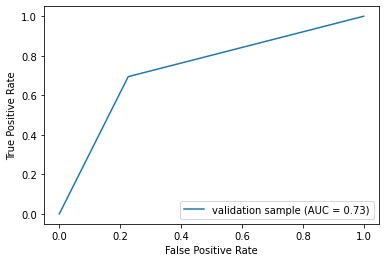

In [13]:
#@title plot ROC curve
fpr, tpr , threshold = roc_curve (y_test, y_preds, pos_label = 1, drop_intermediate = False)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name='validation sample')
display.plot()
plt.savefig(pathtoSave + 'roc_curve_test_full.png')

In [14]:
#@title Save roc_auc 
macro = roc_auc_score(y_test, y_preds,average='macro')
weighted = roc_auc_score(y_test, y_preds,average='weighted')
roc = {'macro':  [macro],
        'weighted': [weighted],
        }

roc = pd.DataFrame(roc)
roc
roc.to_csv(pathtoSave + 'roc_report_test_full.csv', index= True)

In [15]:
#@title Save performance results
cls = classification_report(y_test, y_preds, output_dict=True)
clsf_report = pd.DataFrame(cls).transpose()
clsf_report.to_csv( pathtoSave+ 'classification_report_test_full.csv', index= True)

In [16]:
#@title Remove dataframe and model
del df
del model

# Test 80 Percent images


In [ ]:
#@title Folder for SVM maker 
RootDir = pathtoPercentagesImages + 'Test_80'
TargetFolder = pathtoTarget + 'test_80'
for root, dirs, files in os.walk((os.path.normpath(RootDir)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder) #copies csv to new folder

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

In [ ]:
#@title Conditions folders
rootdir = pathtoSVMImages + 'test_80'
output_path = pathtoSVMImages +'test_80/'
csv = pathtoCSV + 'Test_Reshuffle.csv'
no_ds = pd.read_csv(csv)
print(no_ds.columns)

for name in no_ds['File_Name'][no_ds['Class']==1]:
  os.rename(rootdir +'/'+name, rootdir +'/EQ/'+name)

for name in no_ds['File_Name'][no_ds['Class']==0]:
  os.rename(rootdir +'/'+name, rootdir +'/Non_EQ/'+name)


Index(['Class', 'File_Name'], dtype='object')


In [ ]:
#@title Eliminate images outside of category folders
%%bash
cd /content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/test_80/EQ
ls -d | wc *.jpg

    5073     7267   223913 fase1_025e1_10.jpg
    1579     4312   268517 fase1_025e1_11.jpg
    1292     4688   303254 fase1_025e1_12.jpg
    1248     3866   233240 fase1_025e1_13.jpg
    1430     4079   259869 fase1_025e1_1.jpg
     952     3214   210297 fase1_025e1_2.jpg
    4537     6392   195151 fase1_025e1_3.jpg
    1343     3601   220751 fase1_025e1_7.jpg
    1454     4576   296367 fase1_025e1_9.jpg
    1475     4863   320012 fase1_048e1_12.jpg
    1048     3653   250549 fase1_048e1_2.jpg
    1238     4224   287879 fase1_048e1_3.jpg
    5142     7757   262452 fase1_048e1_4.jpg
    1375     4187   267708 fase1_048e1_5.jpg
    1117     3304   220371 fase1_048e1_8.jpg
    1021     3050   208079 fase1_051e1_10.jpg
    1165     3304   215655 fase1_051e1_11.jpg
    1269     3875   252861 fase1_051e1_12.jpg
    1307     3537   218592 fase1_051e1_13.jpg
    1227     3466   229072 fase1_051e1_1.jpg
    1315     4130   249359 fase1_051e1_2.jpg
    1400     3621   227061 fase1_051e1_3.jpg
 

In [ ]:
#@title SVM dataframe maker
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir=pathtoSVMImages +'test_80'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(224,224,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

df.to_pickle(pathtoSVMImages +'test_80/svm_df.pkl')

loading... category : EQ
loaded category:EQ successfully
loading... category : Non_EQ
loaded category:Non_EQ successfully


In [17]:
#@title Load dataframe
df = pd.read_pickle(pathtoSVMImages +'test_80/svm_df.pkl')

In [18]:
#@title Load model
model = pickle.load(open(pathtoModel + 'svm_model_EQ.p','rb')) 
print(model)

SVC(C=10, gamma=0.0001)


In [19]:
#@title Model predictions
x_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]
y_preds = model.predict(x_test)

In [20]:
#@title Performance measures

#Classification report
print(classification_report(y_test, y_preds))

# get accuracy and confusion matrix:
print(f"The model is {accuracy_score(y_preds,y_test)*100}% accurate")
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       106
           1       0.75      0.72      0.73       144

    accuracy                           0.70       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.70      0.70      0.70       250

The model is 69.6% accurate
[[ 71  41]
 [ 35 103]]


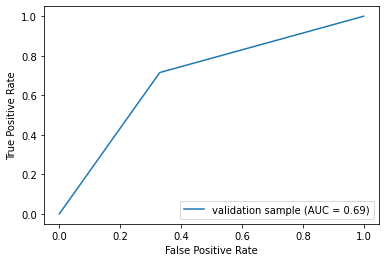

In [26]:
#@title plot ROC curve
fpr, tpr , threshold = roc_curve (y_test, y_preds, pos_label = 1, drop_intermediate = False)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name='validation sample')
display.plot()
plt.savefig(pathtoSave + 'roc_curve_test_80.png')

In [22]:
#@title Save roc_auc 
macro = roc_auc_score(y_test, y_preds,average='macro')
weighted = roc_auc_score(y_test, y_preds,average='weighted')
roc = {'macro':  [macro],
        'weighted': [weighted],
        }

roc = pd.DataFrame(roc)
roc
roc.to_csv(pathtoSave+ 'roc_report_test_80.csv', index= True)

In [23]:
#@title Save performance results
cls = classification_report(y_test, y_preds, output_dict=True)
clsf_report = pd.DataFrame(cls).transpose()
clsf_report.to_csv(pathtoSave + 'classification_report_test_80.csv', index= True)

In [27]:
#@title Remove dataframe and model
del df
del model

# Test 50 percent images

In [ ]:
#@title Folder for SVM maker 
RootDir = pathtoPercentagesImages + 'Test_50'
TargetFolder = pathtoTarget +'test_50'
for root, dirs, files in os.walk((os.path.normpath(RootDir)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder) #copies csv to new folder

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

In [ ]:
#@title Conditions folders
rootdir = pathtoSVMImages +'test_50'
output_path = pathtoSVMImages +'test_50/'
csv = pathtoCSV + 'Test_Reshuffle.csv'
no_ds = pd.read_csv(csv)
print(no_ds.columns)

for name in no_ds['File_Name'][no_ds['Class']==1]:
  os.rename(rootdir +'/'+name, rootdir +'/EQ/'+name)

for name in no_ds['File_Name'][no_ds['Class']==0]:
  os.rename(rootdir +'/'+name, rootdir +'/Non_EQ/'+name)


Index(['Class', 'File_Name'], dtype='object')


In [ ]:
#@title Eliminate images outside of category folders
%%bash
cd /content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/test_SVM/test_50/EQ
ls -d | wc *.jpg

bash: line 1: cd: /content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/test_SVM/test_50/EQ: No such file or directory
wc: '*.jpg': No such file or directory


In [ ]:
#@title SVM dataframe maker
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir=pathtoSVMImages +'test_50'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(224,224,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

df.to_pickle(pathtoSVMImages +'test_50/svm_df.pkl')

loading... category : EQ
loaded category:EQ successfully
loading... category : Non_EQ
loaded category:Non_EQ successfully


In [28]:
#@title Load dataframe
df = pd.read_pickle(pathtoSVMImages +'test_50/svm_df.pkl')

In [31]:
#@title Load model
model = pickle.load(open(pathtoModel +'svm_model_EQ.p','rb')) 
print(model)

SVC(C=10, gamma=0.0001)


In [32]:
#@title Model predictions
x_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]
y_preds = model.predict(x_test)

In [33]:
#@title Performance measures

#Classification report
print(classification_report(y_test, y_preds))

# get accuracy and confusion matrix:
print(f"The model is {accuracy_score(y_preds,y_test)*100}% accurate")
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.67      0.58      0.63       106
           1       0.72      0.79      0.75       144

    accuracy                           0.70       250
   macro avg       0.70      0.69      0.69       250
weighted avg       0.70      0.70      0.70       250

The model is 70.39999999999999% accurate
[[ 62  30]
 [ 44 114]]


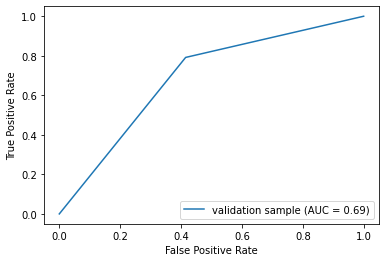

In [34]:
#@title plot ROC curve
fpr, tpr , threshold = roc_curve (y_test, y_preds, pos_label = 1, drop_intermediate = False)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name='validation sample')
display.plot()
plt.savefig(pathtoSave + 'roc_curve_test_50.png')

In [35]:
#@title Save roc_auc 
macro = roc_auc_score(y_test, y_preds,average='macro')
weighted = roc_auc_score(y_test, y_preds,average='weighted')
roc = {'macro':  [macro],
        'weighted': [weighted],
        }

roc = pd.DataFrame(roc)
roc
roc.to_csv(pathtoSave+ 'roc_report_test_50.csv', index= True)

In [36]:
#@title Save performance results
cls = classification_report(y_test, y_preds, output_dict=True)
clsf_report = pd.DataFrame(cls).transpose()
clsf_report.to_csv(pathtoSave + 'classification_report_test_50.csv', index= True)

In [37]:
#@title Remove dataframe and model
del df
del model

# Test 30 percent images

In [ ]:
#@title Folder for SVM maker 
RootDir = pathtoPercentagesImages + 'Test_30'
TargetFolder = pathtoTarget + 'test_30'
for root, dirs, files in os.walk((os.path.normpath(RootDir)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder) #copies csv to new folder

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

In [ ]:
#@title Conditions folders
rootdir = pathtoSVMImages +'test_30'
output_path = pathtoSVMImages +'test_30/'
csv = pathtoCSV + 'Test_Reshuffle.csv'
no_ds = pd.read_csv(csv)
print(no_ds.columns)

for name in no_ds['File_Name'][no_ds['Class']==1]:
  os.rename(rootdir +'/'+name, rootdir +'/EQ/'+name)

for name in no_ds['File_Name'][no_ds['Class']==0]:
  os.rename(rootdir +'/'+name, rootdir +'/Non_EQ/'+name)


Index(['Class', 'File_Name'], dtype='object')


In [ ]:
#@title Eliminate images outside of category folders
%%bash
cd /content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/test_30/EQ
ls -d | wc *.jpg

    1354     3012   175513 fase1_025e1_10.jpg
    1168     2944   186955 fase1_025e1_11.jpg
    1231     3396   222126 fase1_025e1_12.jpg
     914     2796   189340 fase1_025e1_13.jpg
    1054     2914   182996 fase1_025e1_1.jpg
    1123     2830   162345 fase1_025e1_2.jpg
     973     2356   155470 fase1_025e1_3.jpg
    1048     2771   181692 fase1_025e1_7.jpg
    5007     7319   224594 fase1_025e1_9.jpg
    1296     3612   227927 fase1_048e1_12.jpg
    1010     2831   189188 fase1_048e1_2.jpg
    1034     3004   202928 fase1_048e1_3.jpg
    1132     3056   199592 fase1_048e1_4.jpg
    1273     2993   185284 fase1_048e1_5.jpg
    1322     2768   165388 fase1_048e1_8.jpg
     904     2399   160096 fase1_051e1_10.jpg
    1293     2856   164183 fase1_051e1_11.jpg
    1202     3063   189494 fase1_051e1_12.jpg
    1129     2407   150621 fase1_051e1_13.jpg
     933     2568   175701 fase1_051e1_1.jpg
     994     2842   187369 fase1_051e1_2.jpg
    1179     2756   166929 fase1_051e1_3.jpg
 

In [ ]:
#@title SVM dataframe maker
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir=pathtoSVMImages +'test_30'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(224,224,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

df.to_pickle(pathtoSVMImages +'test_30/svm_df.pkl')

loading... category : EQ
loaded category:EQ successfully
loading... category : Non_EQ
loaded category:Non_EQ successfully


In [5]:
#@title Load dataframe
df = pd.read_pickle(pathtoSVMImages +'test_30/svm_df.pkl')

In [6]:
#@title Load model
model = pickle.load(open(pathtoModel + 'svm_model_EQ.p','rb')) 
print(model)

SVC(C=10, gamma=0.0001)


In [7]:
#@title Model predictions
x_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]
y_preds = model.predict(x_test)

In [8]:
#@title Performance measures

#Classification report
print(classification_report(y_test, y_preds))

# get accuracy and confusion matrix:
print(f"The model is {accuracy_score(y_preds,y_test)*100}% accurate")
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.60      0.23      0.33       106
           1       0.61      0.89      0.72       144

    accuracy                           0.61       250
   macro avg       0.60      0.56      0.53       250
weighted avg       0.61      0.61      0.56       250

The model is 60.8% accurate
[[ 24  16]
 [ 82 128]]


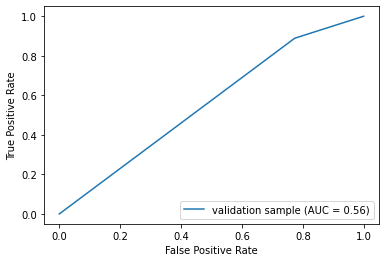

In [9]:
#@title plot ROC curve
fpr, tpr , threshold = roc_curve (y_test, y_preds, pos_label = 1, drop_intermediate = False)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name='validation sample')
display.plot()
plt.savefig(pathtoSave + 'roc_curve_test_30.png')

In [10]:
#@title Save roc_auc 
macro = roc_auc_score(y_test, y_preds,average='macro')
weighted = roc_auc_score(y_test, y_preds,average='weighted')
roc = {'macro':  [macro],
        'weighted': [weighted],
        }

roc = pd.DataFrame(roc)
roc
roc.to_csv(pathtoSave + 'roc_report_test_30.csv', index= True)

In [11]:
#@title Save performance results
cls = classification_report(y_test, y_preds, output_dict=True)
clsf_report = pd.DataFrame(cls).transpose()
clsf_report.to_csv(pathtoSave + 'classification_report_test_30.csv', index= True)

In [12]:
#@title Remove dataframe and model
del df
del model

# Test 15 percentage images

In [ ]:
#@title Folder for SVM maker 
RootDir = pathtoPercentagesImages + 'Test_15'
TargetFolder = pathtoTarget + 'test_15'
for root, dirs, files in os.walk((os.path.normpath(RootDir)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder) #copies csv to new folder

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

In [ ]:
#@title Conditions folders
rootdir = pathtoSVMImages + 'test_15'
output_path =  pathtoSVMImages +'test_15/'
csv = pathtoCSV + 'Test_Reshuffle.csv'
no_ds = pd.read_csv(csv)
print(no_ds.columns)

for name in no_ds['File_Name'][no_ds['Class']==1]:
  os.rename(rootdir +'/'+name, rootdir +'/EQ/'+name)

for name in no_ds['File_Name'][no_ds['Class']==0]:
  os.rename(rootdir +'/'+name, rootdir +'/Non_EQ/'+name)

Index(['Class', 'File_Name'], dtype='object')


In [ ]:
#@title Eliminate images outside of category folders
%%bash
cd /content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/test_15/EQ
ls -d | wc *.jpg

    1310     2688   152856 fase1_025e1_10.jpg
    4834     6275   162891 fase1_025e1_11.jpg
    1121     3070   181790 fase1_025e1_12.jpg
    1096     2598   163059 fase1_025e1_13.jpg
    1189     2846   159806 fase1_025e1_1.jpg
    1191     2399   146014 fase1_025e1_2.jpg
    1061     2326   149201 fase1_025e1_3.jpg
    1027     2316   153767 fase1_025e1_7.jpg
    1417     3086   178947 fase1_025e1_9.jpg
    1077     2860   188217 fase1_048e1_12.jpg
    1032     2571   164872 fase1_048e1_2.jpg
    4710     6324   177834 fase1_048e1_3.jpg
    4808     6273   165562 fase1_048e1_4.jpg
    1002     2566   169477 fase1_048e1_5.jpg
    1271     2467   148725 fase1_048e1_8.jpg
    4385     5664   146067 fase1_051e1_10.jpg
    1269     2503   143705 fase1_051e1_11.jpg
    1053     2674   161186 fase1_051e1_12.jpg
    1049     2241   144055 fase1_051e1_13.jpg
    1086     2327   151120 fase1_051e1_1.jpg
    1028     2459   163565 fase1_051e1_2.jpg
    4862     6151   146529 fase1_051e1_3.jpg
 

In [ ]:
#@title SVM dataframe maker
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir= pathtoSVMImages +'test_15'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(224,224,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

df.to_pickle( pathtoSVMImages +'test_15/svm_df.pkl')

loading... category : EQ
loaded category:EQ successfully
loading... category : Non_EQ
loaded category:Non_EQ successfully


In [13]:
#@title Load dataframe
df = pd.read_pickle( pathtoSVMImages +'test_15/svm_df.pkl')

In [14]:
#@title Load model
model = pickle.load(open(pathtoModel + 'svm_model_EQ.p','rb')) 
print(model)

SVC(C=10, gamma=0.0001)


In [15]:
#@title Model predictions
x_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]
y_preds = model.predict(x_test)

In [16]:
#@title Performance measures

#Classification report
print(classification_report(y_test, y_preds))

# get accuracy and confusion matrix:
print(f"The model is {accuracy_score(y_preds,y_test)*100}% accurate")
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.50      0.06      0.10       106
           1       0.58      0.96      0.72       144

    accuracy                           0.58       250
   macro avg       0.54      0.51      0.41       250
weighted avg       0.55      0.58      0.46       250

The model is 57.599999999999994% accurate
[[  6   6]
 [100 138]]


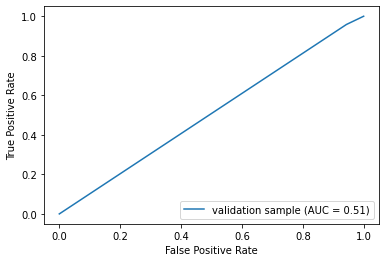

In [17]:
#@title plot ROC curve
fpr, tpr , threshold = roc_curve (y_test, y_preds, pos_label = 1, drop_intermediate = False)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name='validation sample')
display.plot()
plt.savefig(pathtoSave + 'roc_curve_test_15.png')

In [18]:
#@title Save roc_auc 
macro = roc_auc_score(y_test, y_preds,average='macro')
weighted = roc_auc_score(y_test, y_preds,average='weighted')
roc = {'macro':  [macro],
        'weighted': [weighted],
        }

roc = pd.DataFrame(roc)
roc
roc.to_csv(pathtoSave + 'roc_report_test_15.csv', index= True)

In [19]:
#@title Save performance results
cls = classification_report(y_test, y_preds, output_dict=True)
clsf_report = pd.DataFrame(cls).transpose()
clsf_report.to_csv(pathtoSave + 'classification_report_test_15.csv', index= True)

In [20]:
#@title Remove dataframe and model
del df
del model

# Test 15 seconds images

In [ ]:
#@title Folder for SVM maker 
RootDir = pathtoTimingsImages + 'Test_15s'
TargetFolder = pathtoTarget + 'test_15s'
for root, dirs, files in os.walk((os.path.normpath(RootDir)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder) #copies csv to new folder

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

In [ ]:
#@title Conditions folders
rootdir =  pathtoSVMImages +'test_15s'
output_path =  pathtoSVMImages +'test_15s/'
csv = pathtoCSV + 'Test_Reshuffle.csv'
no_ds = pd.read_csv(csv)
print(no_ds.columns)

for name in no_ds['File_Name'][no_ds['Class']==1]:
  os.rename(rootdir +'/'+name, rootdir +'/EQ/'+name)

for name in no_ds['File_Name'][no_ds['Class']==0]:
  os.rename(rootdir +'/'+name, rootdir +'/Non_EQ/'+name)

Index(['Class', 'File_Name'], dtype='object')


In [ ]:
#@title Eliminate images outside of category folders
%%bash
cd /content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/test_15s/EQ
ls -d | wc *.jpg

    5240     7662   240644 fase1_025e1_10.jpg
    1245     4144   284074 fase1_025e1_11.jpg
    5072     7963   280857 fase1_025e1_12.jpg
    1185     3809   248005 fase1_025e1_13.jpg
    1253     4023   264227 fase1_025e1_1.jpg
    1444     3605   223347 fase1_025e1_2.jpg
    1360     3329   204488 fase1_025e1_3.jpg
    1388     3726   232106 fase1_025e1_7.jpg
    1536     4530   286685 fase1_025e1_9.jpg
    1394     3817   240181 fase1_048e1_12.jpg
    1529     4301   265406 fase1_048e1_2.jpg
    4981     7990   288771 fase1_048e1_3.jpg
    1407     4504   270242 fase1_048e1_4.jpg
    1617     4695   278353 fase1_048e1_5.jpg
    1117     3499   237147 fase1_048e1_8.jpg
    1083     3668   229293 fase1_051e1_10.jpg
    1220     3602   228303 fase1_051e1_11.jpg
    1488     4340   277644 fase1_051e1_12.jpg
    1268     3597   232550 fase1_051e1_13.jpg
    1327     4066   245414 fase1_051e1_1.jpg
    1178     3836   261642 fase1_051e1_2.jpg
    1301     3784   236222 fase1_051e1_3.jpg
 

In [ ]:
#@title SVM dataframe maker
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir= pathtoSVMImages +'test_15s'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(224,224,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

df.to_pickle( pathtoSVMImages +'test_15s/svm_df.pkl')

loading... category : EQ
loaded category:EQ successfully
loading... category : Non_EQ
loaded category:Non_EQ successfully


In [21]:
#@title Load dataframe
df = pd.read_pickle( pathtoSVMImages +'test_15s/svm_df.pkl')

In [23]:
#@title Load model
model = pickle.load(open( pathtoModel +'svm_model_EQ.p','rb')) 
print(model)

SVC(C=10, gamma=0.0001)


In [24]:
#@title Model predictions
x_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]
y_preds = model.predict(x_test)

In [25]:
#@title Performance measures

#Classification report
print(classification_report(y_test, y_preds))

# get accuracy and confusion matrix:
print(f"The model is {accuracy_score(y_preds,y_test)*100}% accurate")
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       106
           1       0.80      0.76      0.78       144

    accuracy                           0.76       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.76      0.76      0.76       250

The model is 75.6% accurate
[[ 79  34]
 [ 27 110]]


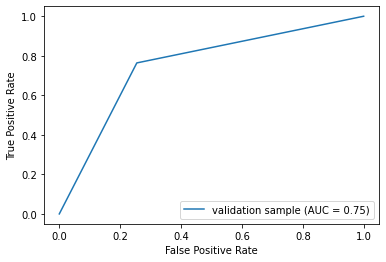

In [26]:
#@title plot ROC curve
fpr, tpr , threshold = roc_curve (y_test, y_preds, pos_label = 1, drop_intermediate = False)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name='validation sample')
display.plot()
plt.savefig(pathtoSave + 'roc_curve_test_15s.png')

In [27]:
#@title Save roc_auc 
macro = roc_auc_score(y_test, y_preds,average='macro')
weighted = roc_auc_score(y_test, y_preds,average='weighted')
roc = {'macro':  [macro],
        'weighted': [weighted],
        }

roc = pd.DataFrame(roc)
roc
roc.to_csv(pathtoSave + 'roc_report_test_15s.csv', index= True)

In [28]:
#@title Save performance results
cls = classification_report(y_test, y_preds, output_dict=True)
clsf_report = pd.DataFrame(cls).transpose()
clsf_report.to_csv(pathtoSave + 'classification_report_15s_test.csv', index= True)

In [29]:
#@title Remove dataframe and model
del df
del model

# Test 10 seconds images

In [ ]:
#@title Folder for SVM maker 
RootDir = pathtoTimingsImages + 'Test_10s'
TargetFolder = pathtoTarget + 'test_10s'
for root, dirs, files in os.walk((os.path.normpath(RootDir)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder) #copies csv to new folder

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

In [ ]:
#@title Conditions folders
rootdir = pathtoSVMImages + 'test_10s'
output_path = pathtoSVMImages + 'test_10s/'
csv = pathtoCSV + 'Test_Reshuffle.csv'
no_ds = pd.read_csv(csv)
print(no_ds.columns)

for name in no_ds['File_Name'][no_ds['Class']==1]:
  os.rename(rootdir +'/'+name, rootdir +'/EQ/'+name)

for name in no_ds['File_Name'][no_ds['Class']==0]:
  os.rename(rootdir +'/'+name, rootdir +'/Non_EQ/'+name)

Index(['Class', 'File_Name'], dtype='object')


In [ ]:
#@title Eliminate images outside of category folders
%%bash
cd /content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/test_10s/EQ
ls -d | wc *.jpg

    5240     7662   240644 fase1_025e1_10.jpg
    1755     4397   258227 fase1_025e1_11.jpg
    1440     3928   243878 fase1_025e1_12.jpg
    5021     7456   237144 fase1_025e1_13.jpg
    1265     3591   232066 fase1_025e1_1.jpg
    1444     3605   223347 fase1_025e1_2.jpg
    1360     3329   204488 fase1_025e1_3.jpg
    1281     3625   229367 fase1_025e1_7.jpg
    1442     3991   249182 fase1_025e1_9.jpg
    1440     3668   228559 fase1_048e1_12.jpg
    4773     7141   235241 fase1_048e1_2.jpg
    1542     4110   247352 fase1_048e1_3.jpg
    4963     7521   249572 fase1_048e1_4.jpg
    1343     3642   233435 fase1_048e1_5.jpg
    1239     3532   231145 fase1_048e1_8.jpg
    1083     3668   229293 fase1_051e1_10.jpg
    1214     3521   225549 fase1_051e1_11.jpg
    1268     3730   240535 fase1_051e1_12.jpg
    1282     3617   232276 fase1_051e1_13.jpg
    1352     3752   238557 fase1_051e1_1.jpg
    1313     4196   251009 fase1_051e1_2.jpg
    1302     3636   234497 fase1_051e1_3.jpg
 

In [ ]:
#@title SVM dataframe maker
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir=pathtoSVMImages + 'test_10s'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(224,224,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

df.to_pickle(pathtoSVMImages + 'test_10s/svm_df.pkl')

loading... category : EQ
loaded category:EQ successfully
loading... category : Non_EQ
loaded category:Non_EQ successfully


In [30]:
#@title Load dataframe
df = pd.read_pickle(pathtoSVMImages + 'test_10s/svm_df.pkl')

In [31]:
#@title Load model
model = pickle.load(open(pathtoModel + 'svm_model_EQ.p','rb')) 
print(model)

SVC(C=10, gamma=0.0001)


In [32]:
#@title Model predictions
x_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]
y_preds = model.predict(x_test)

In [33]:
#@title Performance measures

#Classification report
print(classification_report(y_test, y_preds))

# get accuracy and confusion matrix:
print(f"The model is {accuracy_score(y_preds,y_test)*100}% accurate")
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.65      0.60      0.63       106
           1       0.72      0.76      0.74       144

    accuracy                           0.70       250
   macro avg       0.69      0.68      0.69       250
weighted avg       0.69      0.70      0.69       250

The model is 69.6% accurate
[[ 64  34]
 [ 42 110]]


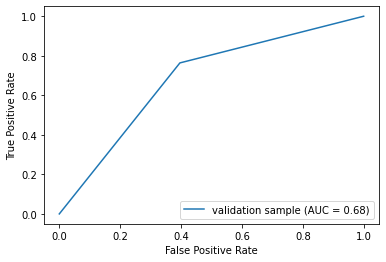

In [34]:
#@title plot ROC curve
fpr, tpr , threshold = roc_curve (y_test, y_preds, pos_label = 1, drop_intermediate = False)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name='validation sample')
display.plot()
plt.savefig(pathtoSave + 'roc_curve_test_10s.png')

In [35]:
#@title Save roc_auc 

macro = roc_auc_score(y_test, y_preds,average='macro')
weighted = roc_auc_score(y_test, y_preds,average='weighted')
roc = {'macro':  [macro],
        'weighted': [weighted],
        }

roc = pd.DataFrame(roc)
roc
roc.to_csv(pathtoSave + 'roc_report_test_10s.csv', index= True)

In [36]:
#@title Save performance results
cls = classification_report(y_test, y_preds, output_dict=True)
clsf_report = pd.DataFrame(cls).transpose()
clsf_report.to_csv(pathtoSave + 'classification_report_10s_test.csv', index= True)

In [37]:
#@title Remove dataframe and model
del df
del model

# Test 5 seconds images

In [ ]:
#@title Folder for SVM maker 
RootDir = pathtoTimingsImages + 'Test_5s'
TargetFolder = pathtoTarget + 'test_5s'
for root, dirs, files in os.walk((os.path.normpath(RootDir)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder) #copies csv to new folder

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

In [ ]:
#@title Conditions folders
rootdir = pathtoSVMImages + 'test_5s'
output_path = pathtoSVMImages + 'test_5s/'
csv = pathtoCSV + 'Test_Reshuffle.csv'
no_ds = pd.read_csv(csv)
print(no_ds.columns)

for name in no_ds['File_Name'][no_ds['Class']==1]:
  os.rename(rootdir +'/'+name, rootdir +'/EQ/'+name)

for name in no_ds['File_Name'][no_ds['Class']==0]:
  os.rename(rootdir +'/'+name, rootdir +'/Non_EQ/'+name)

Index(['Class', 'File_Name'], dtype='object')


In [ ]:
#@title Eliminate images outside of category folders
%%bash
cd /content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/test_5s/EQ
ls -d | wc *.jpg

    1250     3423   197539 fase1_025e1_10.jpg
     972     2762   190065 fase1_025e1_11.jpg
    1161     3018   196198 fase1_025e1_12.jpg
    1212     3278   205459 fase1_025e1_13.jpg
    4991     6647   180301 fase1_025e1_1.jpg
    1228     2846   179000 fase1_025e1_2.jpg
    4637     6567   194072 fase1_025e1_3.jpg
    1161     3357   203576 fase1_025e1_7.jpg
    1072     3185   212452 fase1_025e1_9.jpg
    1304     3327   209986 fase1_048e1_12.jpg
    4588     6453   194978 fase1_048e1_2.jpg
    1102     3121   199859 fase1_048e1_3.jpg
    5229     7106   196601 fase1_048e1_4.jpg
    1077     2769   184996 fase1_048e1_5.jpg
     999     2851   192739 fase1_048e1_8.jpg
    1446     3420   204845 fase1_051e1_10.jpg
    1117     2971   190440 fase1_051e1_11.jpg
    1091     2988   193311 fase1_051e1_12.jpg
    1034     2707   180676 fase1_051e1_13.jpg
     983     2755   183316 fase1_051e1_1.jpg
    1125     3155   199432 fase1_051e1_2.jpg
    4893     6886   197176 fase1_051e1_3.jpg
 

In [ ]:
#@title SVM dataframe maker
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir=pathtoSVMImages + 'test_5s'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(224,224,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

df.to_pickle( pathtoSVMImages +  'test_5s/svm_df.pkl')

loading... category : EQ
loaded category:EQ successfully
loading... category : Non_EQ
loaded category:Non_EQ successfully


In [54]:
#@title Load dataframe
df = pd.read_pickle(pathtoSVMImages + 'test_5s/svm_df.pkl')

In [55]:
#@title Load model
model = pickle.load(open(pathtoModel + 'svm_model_EQ.p','rb')) 
print(model)

SVC(C=10, gamma=0.0001)


In [56]:
#@title Model predictions
x_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]
y_preds = model.predict(x_test)

In [41]:
#@title Performance measures

#Classification report
print(classification_report(y_test, y_preds))

# get accuracy and confusion matrix:
print(f"The model is {accuracy_score(y_preds,y_test)*100}% accurate")
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.67      0.36      0.47       106
           1       0.65      0.87      0.74       144

    accuracy                           0.65       250
   macro avg       0.66      0.61      0.60       250
weighted avg       0.66      0.65      0.62       250

The model is 65.2% accurate
[[ 38  19]
 [ 68 125]]


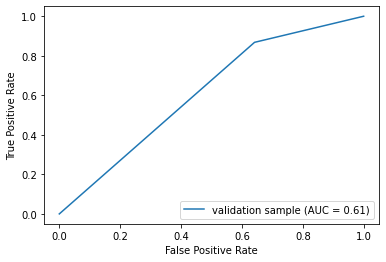

In [57]:
#@title plot ROC curve
fpr, tpr , threshold = roc_curve (y_test, y_preds, pos_label = 1, drop_intermediate = False)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name='validation sample')
display.plot()
plt.savefig(pathtoSave + 'roc_curve_test_5s.png')

In [43]:
#@title Save roc_auc 
macro = roc_auc_score(y_test, y_preds,average='macro')
weighted = roc_auc_score(y_test, y_preds,average='weighted')
roc = {'macro':  [macro],
        'weighted': [weighted],
        }

roc = pd.DataFrame(roc)
roc
roc.to_csv(pathtoSave + 'roc_report_test_5s.csv', index= True)

In [44]:
#@title Save performance results
cls = classification_report(y_test, y_preds, output_dict=True)
clsf_report = pd.DataFrame(cls).transpose()
clsf_report.to_csv(pathtoSave + 'classification_report_5s_test.csv', index= True)

In [45]:
#@title Remove dataframe and model
del df
del model

# Test 2 seconds images

In [ ]:
#@title Folder for SVM maker 
RootDir = pathtoTimingsImages + 'Test_2s'
TargetFolder = pathtoTarget + 'test_2s'
for root, dirs, files in os.walk((os.path.normpath(RootDir)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print ("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder) #copies csv to new folder

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

In [ ]:
#@title Conditions folders
rootdir = pathtoSVMImages + 'test_2s'
output_path = pathtoSVMImages + 'test_2s/'
csv = pathtoCSV + 'Test_Reshuffle.csv'
no_ds = pd.read_csv(csv)
print(no_ds.columns)

for name in no_ds['File_Name'][no_ds['Class']==1]:
  os.rename(rootdir +'/'+name, rootdir +'/EQ/'+name)

for name in no_ds['File_Name'][no_ds['Class']==0]:
  os.rename(rootdir +'/'+name, rootdir +'/Non_EQ/'+name)

Index(['Class', 'File_Name'], dtype='object')


In [ ]:
#@title Eliminate images outside of category folders
%%bash
cd /content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/Test_SVM_EQ/test_2s/EQ
ls -d | wc *.jpg

    1026     2430   156240 fase1_025e1_10.jpg
    1190     2421   150042 fase1_025e1_11.jpg
    1060     2550   161408 fase1_025e1_12.jpg
    1167     2448   155750 fase1_025e1_13.jpg
    1105     2662   157435 fase1_025e1_1.jpg
    1429     2660   146764 fase1_025e1_2.jpg
    1089     2442   155532 fase1_025e1_3.jpg
    1120     2542   161029 fase1_025e1_7.jpg
    4938     6441   164089 fase1_025e1_9.jpg
    4857     6374   166522 fase1_048e1_12.jpg
    1032     2571   164872 fase1_048e1_2.jpg
    1667     3337   174036 fase1_048e1_3.jpg
     956     2666   162064 fase1_048e1_4.jpg
    1145     2629   161478 fase1_048e1_5.jpg
    1235     2530   155895 fase1_048e1_8.jpg
     994     2354   151755 fase1_051e1_10.jpg
    1183     2446   150719 fase1_051e1_11.jpg
    1072     2383   156416 fase1_051e1_12.jpg
    1072     2288   147723 fase1_051e1_13.jpg
    1071     2259   149269 fase1_051e1_1.jpg
    4825     6222   159497 fase1_051e1_2.jpg
    1581     2941   155844 fase1_051e1_3.jpg
 

In [ ]:
#@title SVM dataframe maker
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir=pathtoSVMImages + 'test_2s'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(224,224,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

df.to_pickle( pathtoSVMImages + 'test_2s/svm_df.pkl')

loading... category : EQ
loaded category:EQ successfully
loading... category : Non_EQ
loaded category:Non_EQ successfully


In [46]:
#@title Load dataframe
df = pd.read_pickle( pathtoSVMImages + 'test_2s/svm_df.pkl')

In [47]:
#@title Load model
model = pickle.load(open(pathtoModel + 'svm_model_EQ.p','rb')) 
print(model)

SVC(C=10, gamma=0.0001)


In [48]:
#@title Model predictions
x_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]
y_preds = model.predict(x_test)

In [49]:
#@title Performance measures

#Classification report
print(classification_report(y_test, y_preds))

# get accuracy and confusion matrix:
print(f"The model is {accuracy_score(y_preds,y_test)*100}% accurate")
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07       106
           1       0.59      1.00      0.74       144

    accuracy                           0.59       250
   macro avg       0.79      0.52      0.41       250
weighted avg       0.76      0.59      0.46       250

The model is 59.199999999999996% accurate
[[  4   0]
 [102 144]]


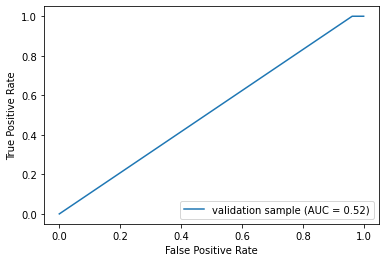

In [50]:
#@title plot ROC curve
fpr, tpr , threshold = roc_curve (y_test, y_preds, pos_label = 1, drop_intermediate = False)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name='validation sample')
display.plot()
plt.savefig(pathtoSave + 'roc_curve_test_2s.png')

In [51]:
#@title Save roc_auc 
macro = roc_auc_score(y_test, y_preds,average='macro')
weighted = roc_auc_score(y_test, y_preds,average='weighted')
roc = {'macro':  [macro],
        'weighted': [weighted],
        }

roc = pd.DataFrame(roc)
roc
roc.to_csv(pathtoSave + 'roc_report_test_2s.csv', index= True)

In [52]:
#@title Save performance results
cls = classification_report(y_test, y_preds, output_dict=True)
clsf_report = pd.DataFrame(cls).transpose()
clsf_report.to_csv(pathtoSave + 'classification_report_2s_test.csv', index= True)

In [53]:
#@title Remove dataframe and model
del df
del model